# Step 1: Load and Clean Data
This code loads the files and fixes the date formats so they can talk to each other.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- Setup Folders & Load Data ---

In [3]:

# This fixes your FileNotFoundError by creating the folder if it's missing
if not os.path.exists('outputs'):
    os.makedirs('outputs')
if not os.path.exists('csv_files'):
    os.makedirs('csv_files')

In [5]:
# Datasets
df_trades = pd.read_csv('historical_data.csv')
df_sentiment = pd.read_csv('fear_greed_index.csv')

# --- Data Cleaning & Preprocessing ---

In [6]:
# Fix Trade Dates
df_trades['datetime'] = pd.to_datetime(df_trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
df_trades['date'] = df_trades['datetime'].dt.date.astype(str)

In [7]:
# Fix Sentiment Dates
if 'date' not in df_sentiment.columns:
    df_sentiment['date'] = pd.to_datetime(df_sentiment['timestamp'], unit='s').dt.date.astype(str)
else:
    df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.date.astype(str)

In [8]:
# Filter columns
df_trades_clean = df_trades[['date', 'Account', 'Coin', 'Size USD', 'Side', 'Direction', 'Closed PnL', 'Execution Price']].copy()

In [9]:
# Merge
df_merged = pd.merge(df_trades_clean, df_sentiment[['date', 'value', 'classification']], on='date', how='inner')

In [10]:
print("Data Merged Successfully!")
print(df_merged.head())

Data Merged Successfully!
         date                                     Account  Coin  Size USD  \
0  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   7872.16   
1  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107    127.68   
2  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   1150.63   
3  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   1142.04   
4  2024-12-02  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107     69.75   

  Side Direction  Closed PnL  Execution Price  value classification  
0  BUY       Buy         0.0           7.9769     80  Extreme Greed  
1  BUY       Buy         0.0           7.9800     80  Extreme Greed  
2  BUY       Buy         0.0           7.9855     80  Extreme Greed  
3  BUY       Buy         0.0           7.9874     80  Extreme Greed  
4  BUY       Buy         0.0           7.9894     80  Extreme Greed  


# Step 2: Perform the Analysis
Analyze how trading behavior aligns or diverges from overall market sentiment

# Key Metrics to Calculate:


*   **Volume vs. Sentiment**: Do they trade more when people are scared?
*   **Profitability vs. Sentiment**: Do they lose money when they are greedy?





# --- Analysis & Visualization ---

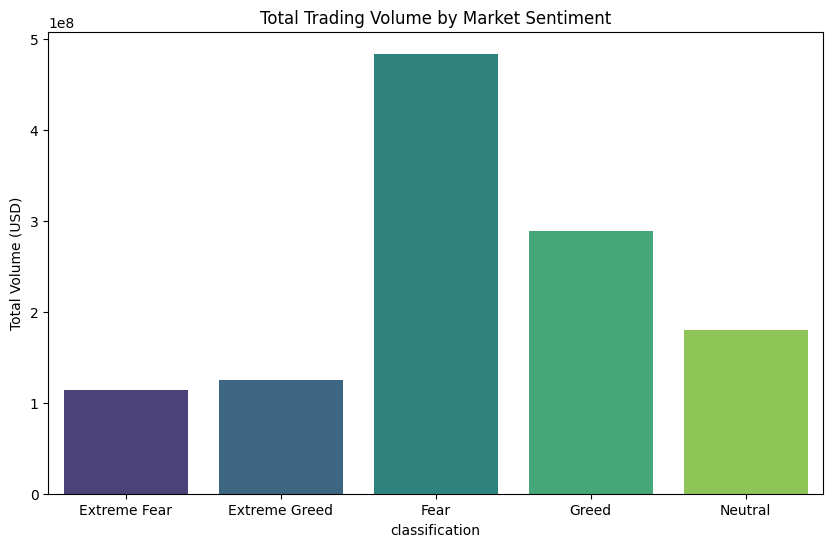

In [11]:
# A. Volume by Sentiment
sentiment_volume = df_merged.groupby('classification')['Size USD'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_volume, x='classification', y='Size USD', hue='classification', palette='viridis', dodge=False)
plt.legend([],[], frameon=False)
plt.title('Total Trading Volume by Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.savefig('outputs/volume_by_sentiment.png')
plt.show()

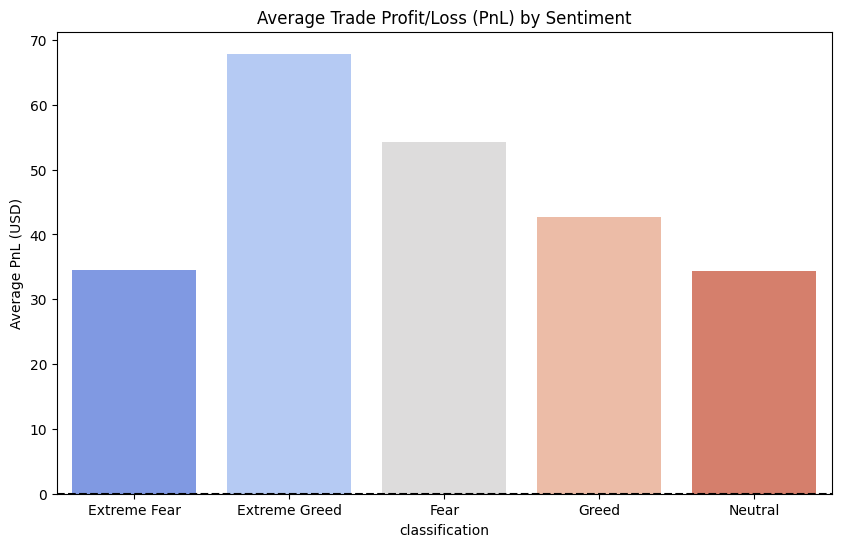

In [13]:
# B. Profitability (PnL) by Sentiment
sentiment_pnl = df_merged.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_pnl, x='classification', y='Closed PnL', hue='classification', palette='coolwarm', dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average Trade Profit/Loss (PnL) by Sentiment')
plt.ylabel('Average PnL (USD)')
plt.axhline(0, color='black', linestyle='--')
plt.savefig('outputs/pnl_by_sentiment.png')
plt.show()

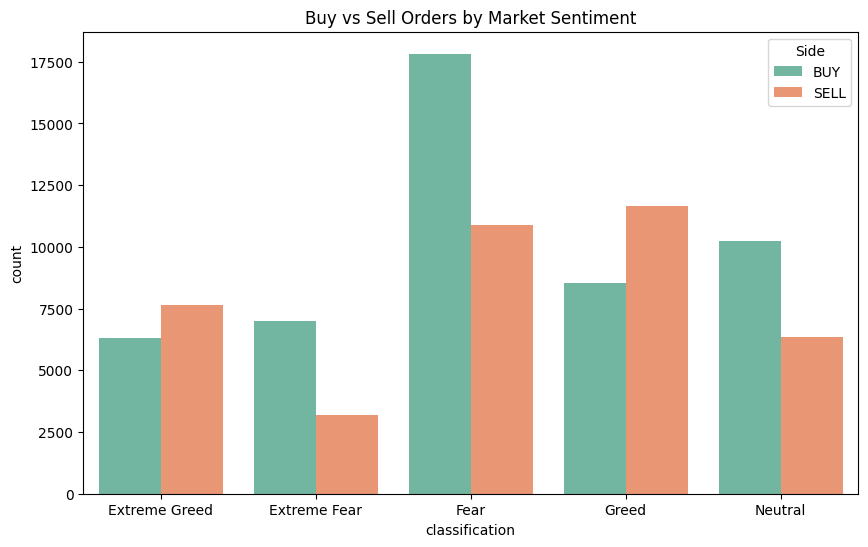

In [14]:
# C. Trading Direction (Buy vs Sell)
df_open = df_merged[df_merged['Direction'].str.contains('Open', na=False)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_open, x='classification', hue='Side', palette='Set2')
plt.title('Buy vs Sell Orders by Market Sentiment')
plt.savefig('outputs/trade_direction_sentiment.png')
plt.show()

In [15]:
# --- 5. Save Processed Data ---
df_merged.to_csv('csv_files/processed_data.csv', index=False)
print("Success! All files saved in 'outputs' and 'csv_files' folders.")

Success! All files saved in 'outputs' and 'csv_files' folders.
